In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
kp = pd.read_csv('kyphosis.csv')

In [3]:
kp.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
kp.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


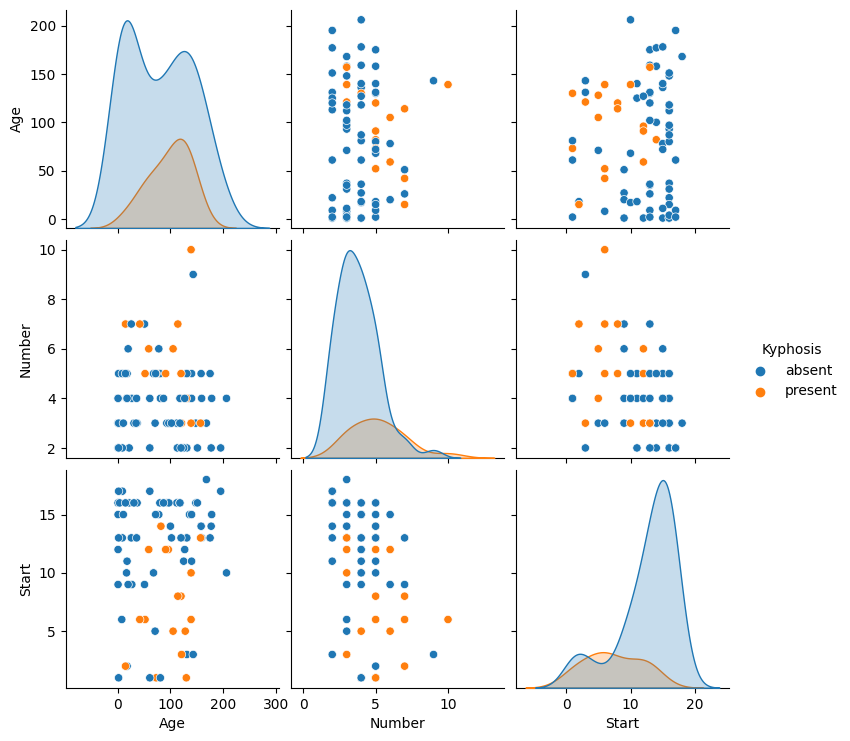

In [6]:
sns.pairplot(kp,hue = 'Kyphosis')

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X = kp.drop('Kyphosis',axis = 1)
y = kp['Kyphosis']

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier()

In [44]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
k = dt.fit(X_train,y_train)

In [46]:
pred = dt.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
confusion_matrix(y_test,pred)

array([[16,  5],
       [ 4,  2]], dtype=int64)

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.80      0.76      0.78        21
     present       0.29      0.33      0.31         6

    accuracy                           0.67        27
   macro avg       0.54      0.55      0.54        27
weighted avg       0.69      0.67      0.68        27



In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
r = RandomForestClassifier(n_estimators=80)

In [52]:
r.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80)

In [53]:
rpred = r.predict(X_test)

In [54]:
confusion_matrix(y_test,rpred)

array([[20,  1],
       [ 5,  1]], dtype=int64)

In [55]:
print(classification_report(y_test,rpred))

              precision    recall  f1-score   support

      absent       0.80      0.95      0.87        21
     present       0.50      0.17      0.25         6

    accuracy                           0.78        27
   macro avg       0.65      0.56      0.56        27
weighted avg       0.73      0.78      0.73        27



In [57]:
kp['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

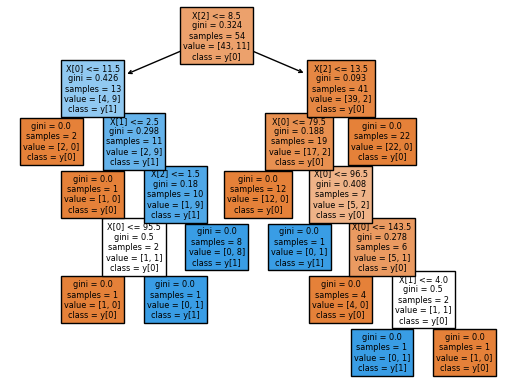

In [68]:
from sklearn import tree
tree.plot_tree(k,class_names=True,filled = True)
plt.show()